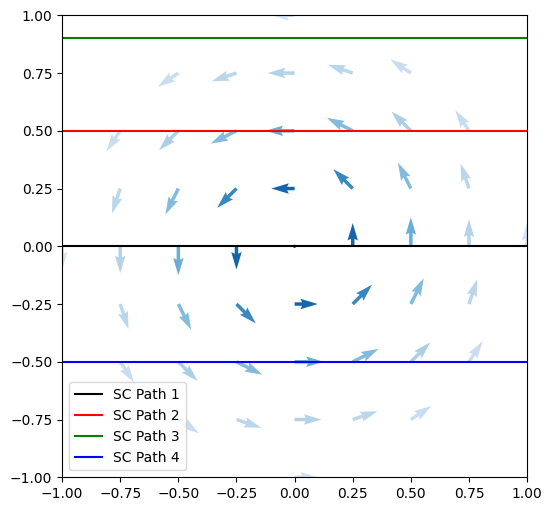

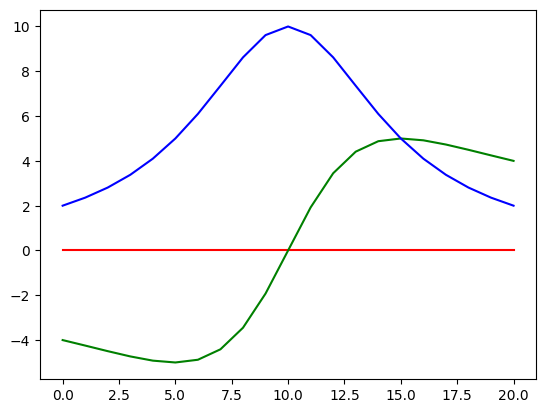

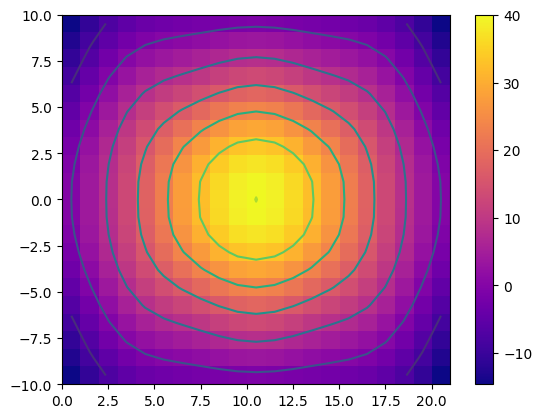

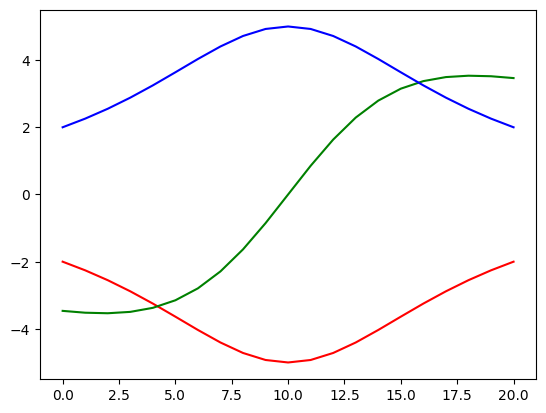

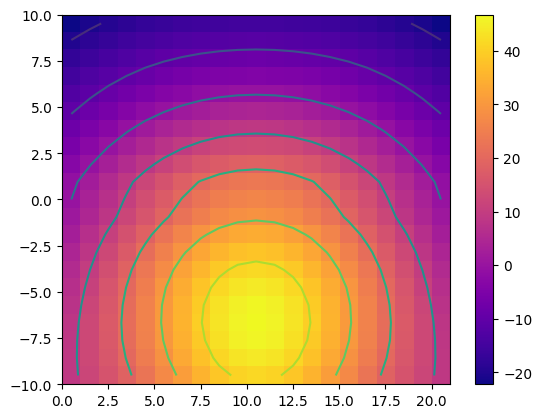

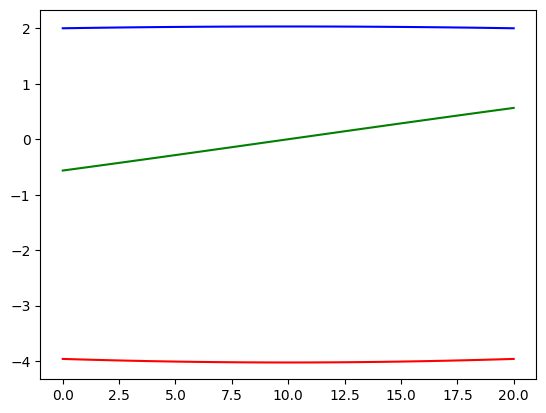

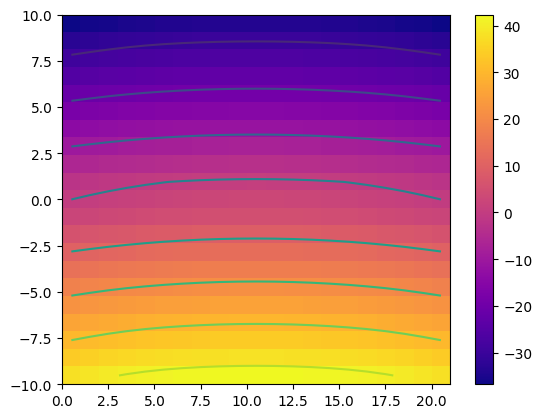

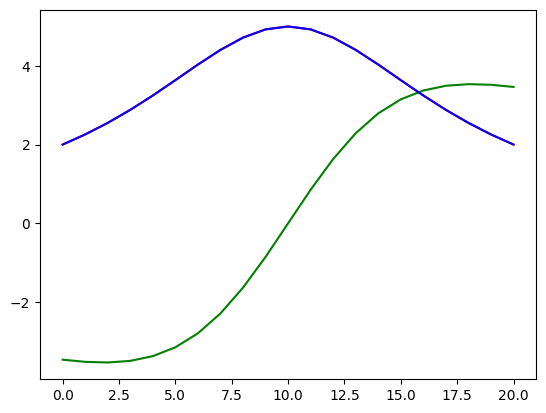

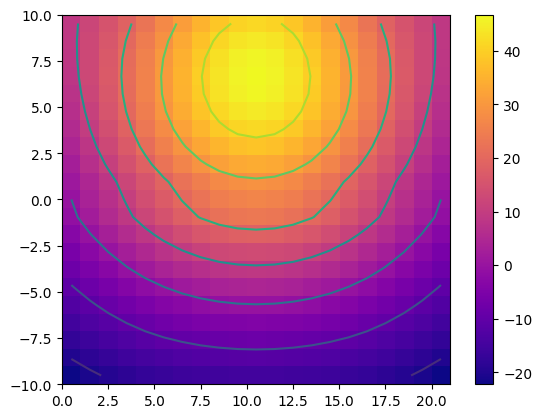

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.special
import matplotlib.cm
from pymfr.reconstruct import reconstruct_cross_section

def gold_hoyle(x, y, B0, T0):
    r = np.sqrt(x ** 2 + y ** 2)
    Bz = B0 / (1 + T0 ** 2 * r ** 2)
    Bphi = B0 * T0 * r / (1 + T0 ** 2 * r ** 2)
    angle = np.arctan2(y, x)
    return -np.sin(angle) * Bphi, np.cos(angle) * Bphi, Bz


def spacecraft_path(y0, n):
    # from x^2 + y0^2 = r0^2
    x0 = np.sqrt(radius ** 2 - y0 ** 2)
    x = np.linspace(-x0, x0, n)
    y = np.linspace(y0, y0, n)
    return x, y


plt.figure(figsize=(6, 6))
radius = 1
B0 = 10
T0 = 2
xx, yy = np.meshgrid(np.linspace(-radius, radius, 9), np.linspace(-radius, radius, 9))
xx = xx.flatten()
yy = yy.flatten()
distance = np.sqrt(xx ** 2 + yy ** 2)
xx = xx[distance <= radius]
yy = yy[distance <= radius]

Bx, By, Bz = gold_hoyle(xx.flatten(), yy.flatten(), B0=B0, T0=T0)
plt.quiver(xx.flatten(), yy.flatten(), Bx, By, color=matplotlib.cm.Blues(Bz / Bz.max()))
plt.axhline(0, color="black", label="SC Path 1")
plt.axhline(0.5, color="red", label="SC Path 2")
plt.axhline(0.9, color="green", label="SC Path 3")
plt.axhline(-0.5, color="blue", label="SC Path 4")
plt.xlim(-radius, radius)
plt.ylim(-radius, radius)
plt.legend()
plt.show()

for impact_parameter in [0, 0.5, .99, -0.5]:
    x, y = spacecraft_path(impact_parameter, 21)
    Bx, By, Bz = gold_hoyle(x, y, B0=B0, T0=T0)
    plt.plot(Bx, color="red")
    plt.plot(By, color="green")
    plt.plot(Bz, color="blue")
    plt.show()
    
    gas_pressure = np.zeros_like(Bz)
    cross_section = reconstruct_cross_section(np.column_stack([Bx, By, Bz]), gas_pressure, poly_order=3, cross_section_sample_spacing=1, aspect_ratio=1)
    extent = (0, 21, -10, 10)
    plt.imshow(cross_section.magnetic_potential, cmap="plasma", extent=extent, origin="lower")
    plt.colorbar()

    plt.contour(cross_section.magnetic_potential, origin="lower", extent=extent)

    plt.xlim(extent[0], extent[1])
    plt.ylim(extent[2], extent[3])
    plt.show()